In [47]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
%matplotlib inline

In [48]:
model = load_model("./modeli/model_1.keras")

In [49]:
class_names = open("./podaci_klasifikacija/signnames.csv").read().strip().split("\n")[1:]
class_names = [l.split(",")[1] for l in class_names]

In [50]:
test = pd.read_csv("./podaci_klasifikacija/Test.csv")

In [51]:
test_labels = test['ClassId'].values.tolist()
test_img_path = "./podaci_klasifikacija"
test_imgs = test['Path'].values

In [52]:
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.convert("L")
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)

In [58]:
print("Testni podaci")
print(len(test_labels))
print(test_data.shape)

Testni podaci
12630
(12630, 30, 30)


In [59]:
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

395/395 [==============================] - 2s 5ms/step


In [60]:
from sklearn.metrics import accuracy_score
print("Preciznost: ", accuracy_score(test_labels, classes_x) * 100)

Preciznost:  96.49247822644497


In [97]:
import random
number_of_image_test = random.randint(0, len(test_imgs))
print(number_of_image_test)

2225


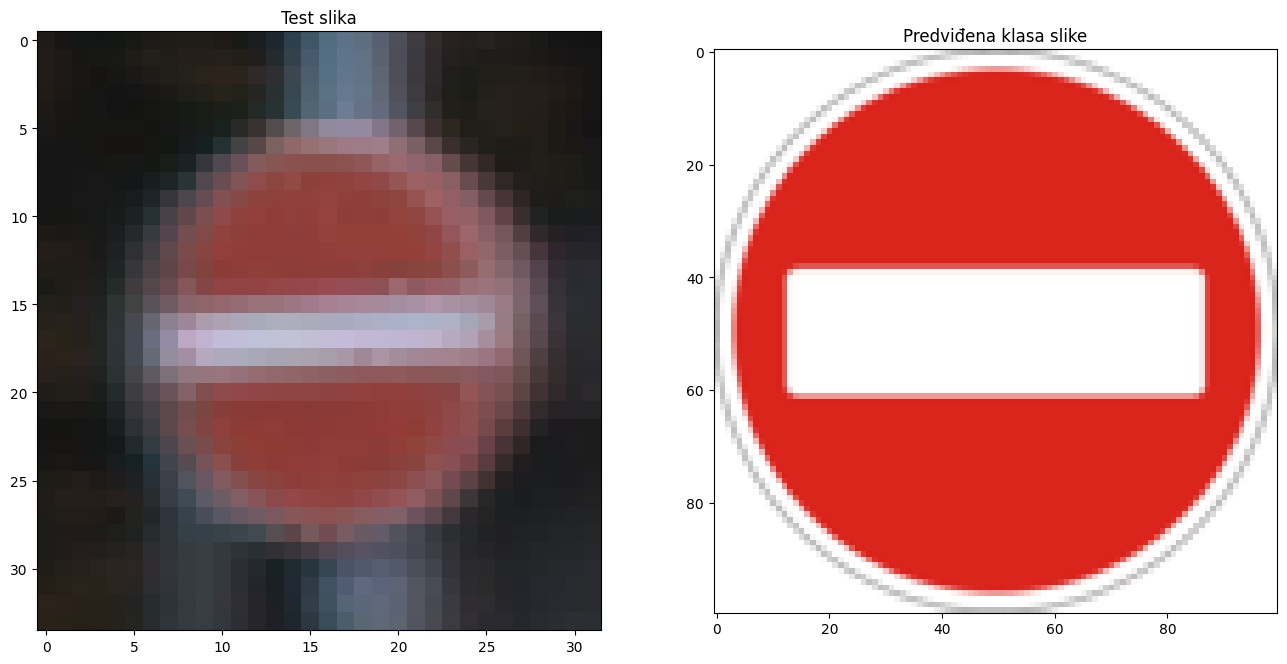

In [98]:
test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
img_path = test_img_path + '/' + test_image_name
img = Image.open(img_path)
plt.imshow(img)
plt.title("Test slika")
plt.subplot(1, 2, 2)
img_pre = Image.open('./podaci_klasifikacija/Meta/' + str(classes_x[number_of_image_test]) + '.png')
plt.imshow(img_pre)
plt.title("Predviđena klasa slike")
plt.show()

In [63]:
from sklearn.metrics import classification_report
test_report = classification_report(test_labels, classes_x)
print(test_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        60
           1       0.98      1.00      0.99       720
           2       0.98      0.98      0.98       750
           3       0.97      0.95      0.96       450
           4       1.00      0.98      0.99       660
           5       0.97      0.95      0.96       630
           6       0.99      0.99      0.99       150
           7       1.00      0.89      0.94       450
           8       1.00      0.91      0.95       450
           9       0.99      0.95      0.97       480
          10       1.00      0.98      0.99       660
          11       0.90      0.95      0.92       420
          12       0.99      0.97      0.98       690
          13       1.00      0.99      1.00       720
          14       0.85      0.99      0.91       270
          15       0.74      1.00      0.85       210
          16       0.99      1.00      1.00       150
          17       0.99    

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, classes_x)

In [65]:
print("Konfuzijska matrica")
cm

Konfuzijska matrica


array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 720,   0, ...,   0,   0,   0],
       [  0,   1, 737, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  56,   0],
       [  0,   0,   0, ...,   0,   0,  90]], dtype=int64)

In [155]:
def predict_image(img):
    data=[]
    image=Image.open(img).resize((30,30))
    image_original = image.copy()
    image = image.convert("L")
    data.append(np.array(image))
    X_test = np.array(data)
    predict_x=model.predict(X_test) 
    Y_pred=np.argmax(predict_x,axis=1)
    confidence = np.max(predict_x)
    return image_original,Y_pred,confidence

1/1 [==============================] - 0s 20ms/step
Prediđena klasa: 38
Naziv klase: Keep right
Sigurnost: 100.0%
----------------------------------------------
Stvarna klasa: 38
Naziv klase: Keep right


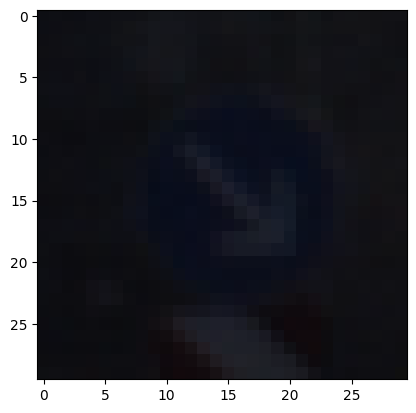

In [156]:
selected_img = "Test/07321.png"
plot, prediction, confidence = predict_image(f'./podaci_klasifikacija/{selected_img}')
row_img = test.loc[test["Path"] == selected_img]
actual_class = row_img["ClassId"].item()
print("Prediđena klasa:",prediction.item())
print("Naziv klase:",class_names[prediction.item()])
print(f"Sigurnost: {confidence*100}%")
print("----------------------------------------------")
print("Stvarna klasa:",actual_class)
print("Naziv klase:",class_names[actual_class])
plt.imshow(plot)
plt.show()

[10600, 2702, 11099, 8694, 56, 9026, 6228, 9858, 12317, 7596, 7817, 3472, 11606, 3075, 8509, 6239, 6709, 5117, 8899, 6545, 946, 11061, 12024, 10470, 644]


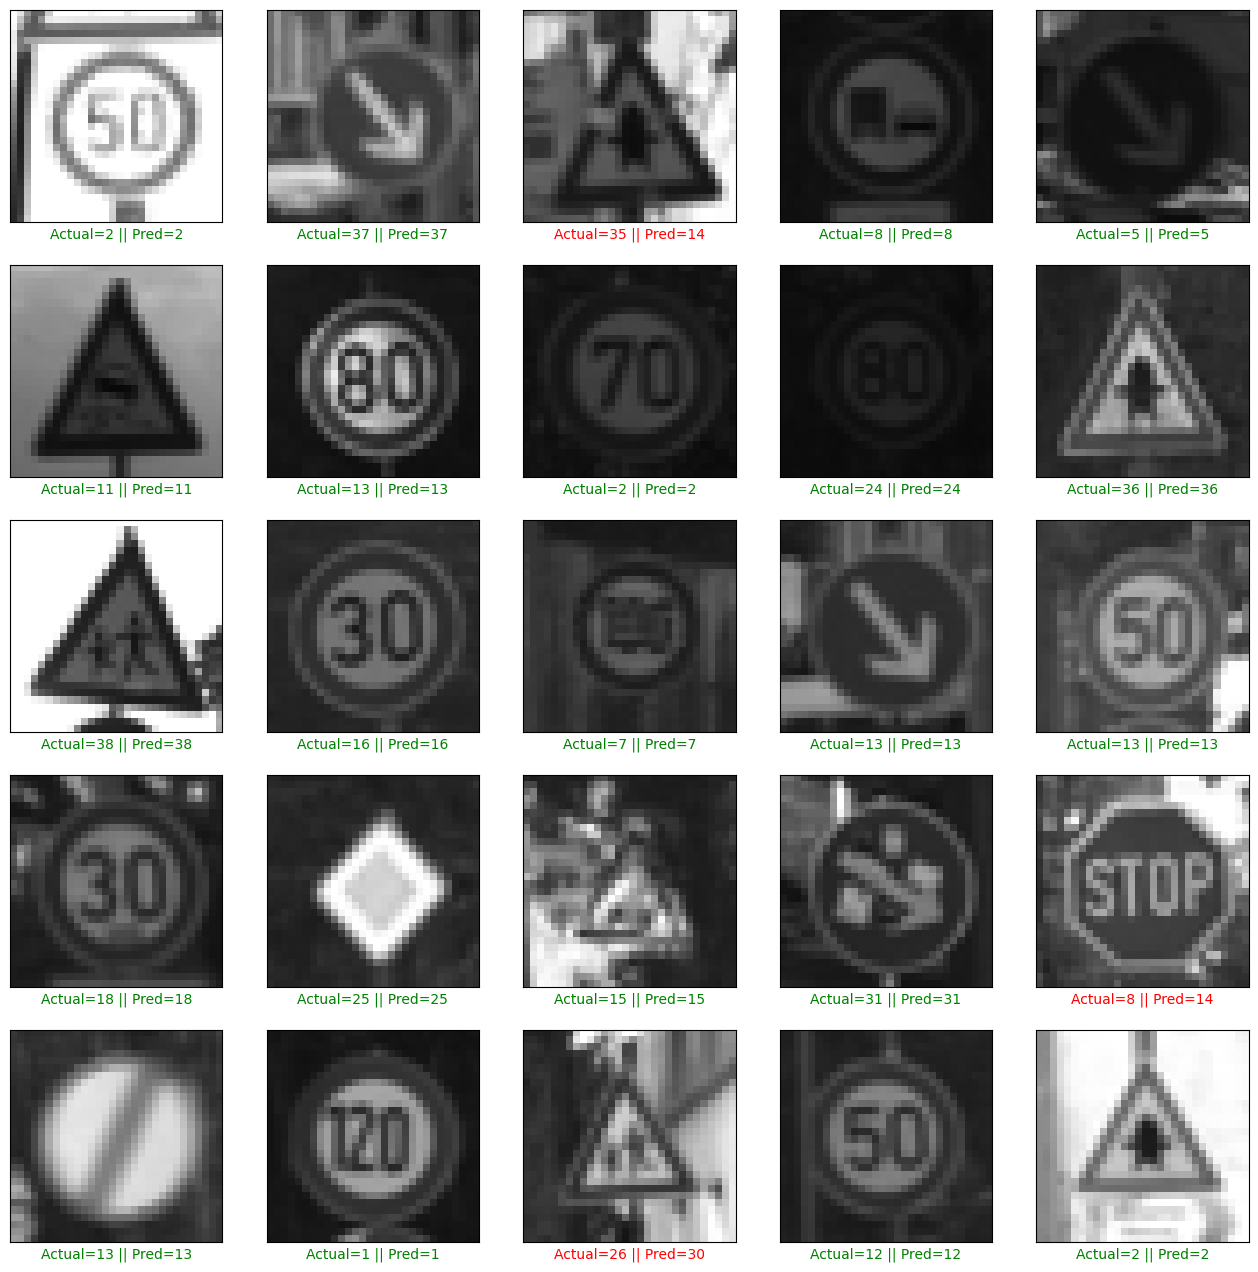

In [170]:
plt.figure(figsize = (16, 16))

start_index = 0
random_numbers = [random.randint(0, len(test_data)) for _ in range(25)]
print(random_numbers)

for i in random_numbers:
    plt.subplot(5, 5, start_index + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[i]
    actual = test_labels[i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    img_gray = Image.fromarray(test_data[start_index + i]).convert("RGB")
    plt.imshow(img_gray)
    start_index += 1
plt.show()